In [168]:
import pandas as pd
import numpy as np
import requests
import os
import io
import tweepy
import json
import timeit
import matplotlib.pyplot as plt

In [169]:
#read twitter-archive-enhanced.csv
df = pd.read_csv('twitter-archive-enhanced.csv')
df_copy = df.copy()

In [170]:
#convert to datetime
df_copy['timestamp'] = pd.to_datetime(df.timestamp)

In [171]:
#only select empty rows in retweeted_status_id to exclude retweet
df_copy = df_copy[pd.isnull(df_copy.retweeted_status_id)]

#drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_copy = df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [172]:
#delete null values
df_copy = df_copy[df_copy.expanded_urls.isnull() == False]

In [173]:
#change 'a' and 'an' values in the name column to None
df_copy['name'] = df_copy['name'].replace(['a','an','the'],'None')

#checked for duplicates in tweet_id NONE
df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [174]:
#Set missing values as nan
df_copy.fillna(np.nan)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [175]:
#Combine columns doggo, floofer , pupper, puppo into one and make none values NAN
df_copy['doggo'] = df_copy['doggo'].replace('None','')
df_copy['floofer'] = df_copy['floofer'].replace('None','')
df_copy['pupper'] = df_copy['pupper'].replace('None','')
df_copy['puppo'] = df_copy['puppo'].replace('None','')

df_copy['stage'] = df_copy.doggo.str.cat(df_copy.floofer).str.cat(df_copy.pupper).str.cat(df_copy.puppo)
df_copy  = df_copy.drop(['doggo','floofer','pupper','puppo'],axis = 1)
df_copy.stage = df_copy.stage.replace('',np.nan)

In [176]:
df_copy.head()

df_copy['rating_numerator'].value_counts()

12      489
10      436
11      417
13      295
9       154
8        98
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
121       1
144       1
Name: rating_numerator, dtype: int64

In [177]:
#change the type for in_reply_to_status_id
df_copy['in_reply_to_status_id'] = df_copy['in_reply_to_status_id'].apply(str)
df_copy['in_reply_to_user_id'] = df_copy['in_reply_to_user_id'].apply(str)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    2117 non-null object
in_reply_to_user_id      2117 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
stage                    338 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 198.5+ KB


In [178]:
#Combine rating_numerator and rating_numerator
df_copy['rating_numerator'] = df_copy['rating_numerator'].apply(str)
df_copy['rating_denominator'] = df_copy['rating_denominator'].apply(str)
df_copy['rating_numerator'].dtype

df_copy['rating_numerator / rating_denominator'] = df_copy['rating_numerator'].str.cat(df_copy['rating_denominator'], sep=' / ')

df_copy = df_copy.drop(['rating_numerator','rating_denominator'],axis =1)

In [105]:
df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating_numerator / rating_denominator
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13 / 10
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13 / 10
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12 / 10
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13 / 10
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12 / 10
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,NaN,13 / 10
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,13 / 10
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,NaN,13 / 10
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,13 / 10
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14 / 10


In [106]:
#read image_predictions.tsv into a dataframe

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urlData = requests.get(url).content
rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8').replace("\t\t","\t")),sep="\t")
image_predictions_copy = rawData.copy()


In [107]:
#change columns name p1, p2 and p3 to uppercase

image_predictions_copy['p1'] =image_predictions_copy['p1'].str.capitalize()
image_predictions_copy['p2'] =image_predictions_copy['p2'].str.capitalize()
image_predictions_copy['p3'] =image_predictions_copy['p2'].str.capitalize()

image_predictions_copy.head()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Collie,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Miniature_pinscher,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Malinois,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Redbone,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Rottweiler,0.154629,True


In [108]:
#checking for null value, there is none
image_predictions_copy.isnull().sum()

#check for duplication in raw data  NONE
image_predictions_copy.duplicated('tweet_id').sum()

image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Data Quality issue (twitter-archive-enhanced):
1. Accuracy - some of the name showing as 'a','an' which are incorrect.
    Solution: change them to None

2. Consistency - the timestamp is not in the datetime format

3. Invalid - only want retweet
    Solution: selected the dataframe with only empty field at retweet_id

4. dropped retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp since they have no use

5. dropped tweets without image

6. Completness: empty data under columns: in_reply_to_status_id, in_reply_to_user_id, text

7. No operation needed on in_reply_to_status_id, change the type to strings


Data Quality issue (image-predictions):

1. Inconsistency - p1, p2 ,p3 - changed to all captialized


Data tidiness issue (twitter-archive-enhanced):
1. Columns - doggo, floofer, pupper and puppo should all be categorised into one column

2. Combined rating_nuermator with rating_denominator since they can be grouped together for tidiness.



In [31]:
#Handling the rate limit using cursors
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            time.sleep(15 * 60)

In [40]:
start = timeit.timeit()

#Twitter API credentials
consumer_key = ''
consumer_secret = ''

access_token = ''
access_secret = ''


auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


#get the total number of tweets for 'dog_rates'
user=api.get_user(4196983835)
dog_rates_total_tweets = user.statuses_count
 
#append the title of the dataframe
all_tweets = []

for status in limit_handled(tweepy.Cursor(api.user_timeline,id=4196983835,count = dog_rates_total_tweets).items()):  
    all_tweets.append(status.id)
    tweet_id = api.get_status(status.id, tweet_mode = 'extended')
    all_tweets.append(tweet_id.retweet_count)
    all_tweets.append(tweet_id.favorite_count)

    
file = open('twitter_data.txt','w')
i = 0
count = 1
list_length = len(all_tweets)

while i < list_length:
        
    if count % 3 == 0:
            file.write(str(all_tweets[i]))
            file.write('\n')
        
    else:
        file.write(str(all_tweets[i]))
        file.write(',')
        
    i += 1
    count += 1
    
file.close()

end = timeit.timeit()
print(end - start)

Rate limit reached. Sleeping for: 644
-0.00044429900026443647


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: generator 'limit_handled' raised StopIteration


In [109]:
title = ['tweet_id','retweet_count','favorite_count']
df_twitter = pd.read_csv('twitter_data.txt',sep=',',header = None,names = title)
df_twitter.head()

,tweet_id,retweet_count,favorite_count
0,1046566169086447617,2,234
1,1046563191340380161,5159,51912
2,1046166828823851009,3,394
3,1046165852859633664,7272,72721
4,1046140550079025154,0,3


In [110]:
#Merge Data
df_copy = pd.merge(image_predictions_copy, df_copy, on = 'tweet_id', how='left')
df_copy = pd.merge(df_copy, df_twitter, on ='tweet_id', how ='left')

In [111]:
df_copy.head()
type(df_copy)

pandas.core.frame.DataFrame

In [112]:
#Data cleaning for the master file
df_copy.to_csv('twitter_archive_master.csv', sep=',', encoding='utf-8')

In [113]:
df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating_numerator / rating_denominator,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Collie,...,nan,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,None,NaN,8 / 10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Miniature_pinscher,...,nan,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,NaN,7 / 10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Malinois,...,nan,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,NaN,9 / 10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Redbone,...,nan,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,NaN,6 / 10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Rottweiler,...,nan,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,NaN,5 / 10,NaN,NaN


In [114]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id                                 2075 non-null int64
jpg_url                                  2075 non-null object
img_num                                  2075 non-null int64
p1                                       2075 non-null object
p1_conf                                  2075 non-null float64
p1_dog                                   2075 non-null bool
p2                                       2075 non-null object
p2_conf                                  2075 non-null float64
p2_dog                                   2075 non-null bool
p3                                       2075 non-null object
p3_conf                                  2075 non-null float64
p3_dog                                   2075 non-null bool
in_reply_to_status_id                    1994 non-null object
in_reply_to_user_id                      1994 non-null object
timestamp                     

In [115]:
# insight 1: count the total number of True in all p1,p2,p3 / average
all_true = df_copy[(df_copy.p1_dog == True) & (df_copy.p2_dog == True) & df_copy.p3_dog == True].count() #1243
total_number_of_row_all_true = df_copy['tweet_id'].count() #total number of columns 2074 

all_true_percentage = 1243 / 2074

print(all_true_percentage)  

0.5993249758919962


In [167]:
# insight 2: count the total number of True in all p1,p2 / average
first_two_true = df_copy[(df_copy.p1_dog == True) & (df_copy.p2_dog == True)& (df_copy.p3_dog == False) ].count() #155

total_number_of_row_first_two_true = 155 / 2074

total_number_of_row_first_two_true


0.07473481195756991

In [166]:
# insight 3: The difference in percentage between all true confidence average and only the first one true cibfudebce average
first_one_true = df_copy[(df_copy.p1_dog == True) & (df_copy.p2_dog == False) & (df_copy.p2_dog == False)].count() #134

total_number_of_row_first_one_true = 134 / 2074

total_number_of_row_first_one_true



0.06460945033751206

In [157]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'], format = "%d/%m/%y",infer_datetime_format=True)


In [135]:
df_copy['week_of_day'] = df_copy.timestamp.dt.weekday_name

df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,name,stage,rating_numerator / rating_denominator,retweet_count,favorite_count,week_of_day
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Collie,...,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,None,NaN,8 / 10,NaN,NaN,Tuesday
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Miniature_pinscher,...,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,NaN,7 / 10,NaN,NaN,Tuesday
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Malinois,...,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,NaN,9 / 10,NaN,NaN,Monday
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Redbone,...,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,NaN,6 / 10,NaN,NaN,Sunday
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Rottweiler,...,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,NaN,5 / 10,NaN,NaN,Saturday


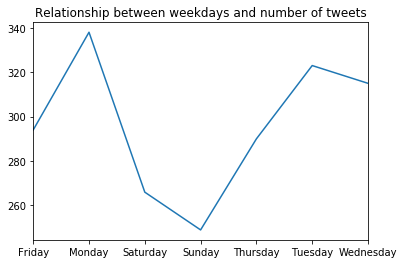

In [155]:
#Visualisation
lines = df_copy.week_of_day.value_counts().sort_index().plot( title = 'Relationship between weekdays and number of tweets', kind = 'line')


